<!-- dom:TITLE: Data Analysis and Machine Learning: Getting started, our first data and Machine Learning encounters -->
# Data Analysis and Machine Learning: Getting started, our first data and Machine Learning encounters
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Aug 14, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license






## Introduction

Our emphasis throughout this series of lectures  
is on understanding the mathematical aspects of
different algorithms used in the fields of data analysis and machine learning. 

However, where possible we will emphasize the
importance of using available software. We start thus with a hands-on
and top-down approach to machine learning. The aim is thus to start with
relevant data or data we have produced 
and use these to introduce statistical data analysis
concepts and machine learning algorithms before we delve into the
algorithms themselves. The examples we will use in the beginning, start with simple
polynomials with random noise added. We will use the Python
software package [Scikit-Learn](http://scikit-learn.org/stable/) and
introduce various machine learning algorithms to make fits of
the data and predictions. We move thereafter to more interesting
cases such as data from say experiments (below we will look at experimental nuclear binding energies as an example).
These are examples where we can easily set up the data and
then use machine learning algorithms included in for example
**Scikit-Learn**. 

These examples will serve us the purpose of getting
started. Furthermore, they allow us to catch more than two birds with
a stone. They will allow us to bring in some programming specific
topics and tools as well as showing the power of various Python 
libraries for machine learning and statistical data analysis.  

Here, we will mainly focus on two
specific Python packages for Machine Learning, Scikit-Learn and
Tensorflow (see below for links etc).  Moreover, the examples we
introduce will serve as inputs to many of our discussions later, as
well as allowing you to set up models and produce your own data and
get started with programming.



## What is Machine Learning?

Statistics, data science and machine learning form important fields of
research in modern science.  They describe how to learn and make
predictions from data, as well as allowing us to extract important
correlations about physical process and the underlying laws of motion
in large data sets. The latter, big data sets, appear frequently in
essentially all disciplines, from the traditional Science, Technology,
Mathematics and Engineering fields to Life Science, Law, education
research, the Humanities and the Social Sciences. 

It has become more
and more common to see research projects on big data in for example
the Social Sciences where extracting patterns from complicated survey
data is one of many research directions.  Having a solid grasp of data
analysis and machine learning is thus becoming central to scientific
computing in many fields, and competences and skills within the fields
of machine learning and scientific computing are nowadays strongly
requested by many potential employers. The latter cannot be
overstated, familiarity with machine learning has almost become a
prerequisite for many of the most exciting employment opportunities,
whether they are in bioinformatics, life science, physics or finance,
in the private or the public sector. This author has had several
students or met students who have been hired recently based on their
skills and competences in scientific computing and data science, often
with marginal knowledge of machine learning.

Machine learning is a subfield of computer science, and is closely
related to computational statistics.  It evolved from the study of
pattern recognition in artificial intelligence (AI) research, and has
made contributions to AI tasks like computer vision, natural language
processing and speech recognition. Many of the methods we will study are also 
strongly rooted in basic mathematics and physics research. 

Ideally, machine learning represents the science of giving computers
the ability to learn without being explicitly programmed.  The idea is
that there exist generic algorithms which can be used to find patterns
in a broad class of data sets without having to write code
specifically for each problem. The algorithm will build its own logic
based on the data.  You should however always keep in mind that
machines and algorithms are to a large extent developed by humans. The
insights and knowledge we have about a specific system, play a central
role when we develop a specific machine learning algorithm. 

Machine learning is an extremely rich field, in spite of its young
age. The increases we have seen during the last three decades in
computational capabilities have been followed by developments of
methods and techniques for analyzing and handling large date sets,
relying heavily on statistics, computer science and mathematics.  The
field is rather new and developing rapidly. Popular software packages
written in Python for machine learning like
[Scikit-learn](http://scikit-learn.org/stable/),
[Tensorflow](https://www.tensorflow.org/),
[PyTorch](http://pytorch.org/) and [Keras](https://keras.io/), all
freely available at their respective GitHub sites, encompass
communities of developers in the thousands or more. And the number of
code developers and contributors keeps increasing. Not all the
algorithms and methods can be given a rigorous mathematical
justification, opening up thereby large rooms for experimenting and
trial and error and thereby exciting new developments.  However, a
solid command of linear algebra, multivariate theory, probability
theory, statistical data analysis, understanding errors and Monte
Carlo methods are central elements in a proper understanding of many
of algorithms and methods we will discuss.



## Types of Machine Learning


The approaches to machine learning are many, but are often split into
two main categories.  In *supervised learning* we know the answer to a
problem, and let the computer deduce the logic behind it. On the other
hand, *unsupervised learning* is a method for finding patterns and
relationship in data sets without any prior knowledge of the system.
Some authours also operate with a third category, namely
*reinforcement learning*. This is a paradigm of learning inspired by
behavioral psychology, where learning is achieved by trial-and-error,
solely from rewards and punishment.

Another way to categorize machine learning tasks is to consider the
desired output of a system.  Some of the most common tasks are:

  * Classification: Outputs are divided into two or more classes. The goal is to   produce a model that assigns inputs into one of these classes. An example is to identify  digits based on pictures of hand-written ones. Classification is typically supervised learning.

  * Regression: Finding a functional relationship between an input data set and a reference data set.   The goal is to construct a function that maps input data to continuous output values.

  * Clustering: Data are divided into groups with certain common traits, without knowing the different groups beforehand.  It is thus a form of unsupervised learning.

The methods we cover have three main topics in common, irrespective of
whether we deal with supervised or unsupervised learning. The first
ingredient is normally our data set (which can be subdivided into
training and test data), the second item is a model which is normally a
function of some parameters.  The model reflects our knowledge of the system (or lack thereof). As an example, if we know that our data show a behavior similar to what would be predicted by a polynomial, fitting our data to a polynomial of some degree would then determin our model. 

The last ingredient is a so-called **cost**
function which allows us to present an estimate on how good our model
is in reproducing the data it is supposed to train.  
At the heart of basically all ML algorithms there are so-called minimization algorithms, often we end up with various variants of **gradient** methods.







## Software and needed installations

We will make extensive use of Python as programming language and its
myriad of available libraries.  You will find
Jupyter notebooks invaluable in your work.  You can run **R**
codes in the Jupyter/IPython notebooks, with the immediate benefit of
visualizing your data. You can also use compiled languages like C++,
Rust, Julia, Fortran etc if you prefer. The focus in these lectures will be
on Python.


If you have Python installed (we strongly recommend Python3) and you feel
pretty familiar with installing different packages, we recommend that
you install the following Python packages via **pip** as 

1. pip install numpy scipy matplotlib ipython scikit-learn mglearn sympy pandas pillow 

For Python3, replace **pip** with **pip3**.

For OSX users we recommend, after having installed Xcode, to
install **brew**. Brew allows for a seamless installation of additional
software via for example 

1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution,
you can use **pip** as well and simply install Python as 

1. sudo apt-get install python3  (or python for pyhton2.7)

etc etc. 



## Python installers

If you don't want to perform these operations separately and venture
into the hassle of exploring how to set up dependencies and paths, we
recommend two widely used distrubutions which set up all relevant
dependencies for Python, namely 

* [Anaconda](https://docs.anaconda.com/), 

which is an open source
distribution of the Python and R programming languages for large-scale
data processing, predictive analytics, and scientific computing, that
aims to simplify package management and deployment. Package versions
are managed by the package management system **conda**. 

* [Enthought canopy](https://www.enthought.com/product/canopy/) 

is a Python
distribution for scientific and analytic computing distribution and
analysis environment, available for free and under a commercial
license.

Furthermore, [Google's Colab](https://colab.research.google.com/notebooks/welcome.ipynb) is a free Jupyter notebook environment that requires 
no setup and runs entirely in the cloud. Try it out!

## Useful Python libraries
Here we list several useful Python libraries we strongly recommend (if you use anaconda many of these are already there)

* [NumPy](https://www.numpy.org/) is a highly popular library for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

* [The pandas](https://pandas.pydata.org/) library provides high-performance, easy-to-use data structures and data analysis tools 

* [Xarray](http://xarray.pydata.org/en/stable/) is a Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!

* [Scipy](https://www.scipy.org/) (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

* [Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

* [Autograd](https://github.com/HIPS/autograd) can automatically differentiate native Python and Numpy code. It can handle a large subset of Python's features, including loops, ifs, recursion and closures, and it can even take derivatives of derivatives of derivatives

* [SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. 

* [scikit-learn](https://scikit-learn.org/stable/) has simple and efficient tools for machine learning, data mining and data analysis

* [TensorFlow](https://www.tensorflow.org/) is a Python library for fast numerical computing created and released by Google

* [Keras](https://keras.io/) is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano

* And many more such as [pytorch](https://pytorch.org/),  [Theano](https://pypi.org/project/Theano/) etc 

## Installing R, C++, cython or Julia

You will also find it convenient to utilize **R**. We will mainly
use Python during our lectures and in various projects and exercises.
Those of you
already familiar with **R** should feel free to continue using **R**, keeping
however an eye on the parallel Python set ups. Similarly, if you are a
Python afecionado, feel free to explore **R** as well.  Jupyter/Ipython
notebook allows you to run **R** codes interactively in your
browser. The software library **R** is really tailored  for statistical data analysis
and allows for an easy usage of the tools and algorithms we will discuss in these
lectures.

To install **R** with Jupyter notebook 
[follow the link here](https://mpacer.org/maths/r-kernel-for-ipython-notebook)




## Installing R, C++, cython, Numba etc


For the C++ aficionados, Jupyter/IPython notebook allows you also to
install C++ and run codes written in this language interactively in
the browser. Since we will emphasize writing many of the algorithms
yourself, you can thus opt for either Python or C++ (or Fortran or other compiled languages) as programming
languages.

To add more entropy, **cython** can also be used when running your
notebooks. It means that Python with the jupyter notebook
setup allows you to integrate widely popular softwares and tools for
scientific computing. Similarly, the 
[Numba Python package](https://numba.pydata.org/) delivers increased performance
capabilities with minimal rewrites of your codes.  With its
versatility, including symbolic operations, Python offers a unique
computational environment. Your jupyter notebook can easily be
converted into a nicely rendered **PDF** file or a Latex file for
further processing. For example, convert to latex as

        pycod jupyter nbconvert filename.ipynb --to latex 


And to add more versatility, the Python package [SymPy](http://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS)  and is entirely written in Python. 

Finally, if you wish to use the light mark-up language 
[doconce](https://github.com/hplgit/doconce) you can convert a standard ascii text file into various HTML 
formats, ipython notebooks, latex files, pdf files etc with minimal edits. These lectures were generated using **doconce**.



## Numpy examples and Important Matrix and vector handling packages

There are several central software libraries for linear algebra and eigenvalue problems. Several of the more
popular ones have been wrapped into ofter software packages like those from the widely used text **Numerical Recipes**. The original source codes in many of the available packages are often taken from the widely used
software package LAPACK, which follows two other popular packages
developed in the 1970s, namely EISPACK and LINPACK.  We describe them shortly here.

  * LINPACK: package for linear equations and least square problems.

  * LAPACK:package for solving symmetric, unsymmetric and generalized eigenvalue problems. From LAPACK's website <http://www.netlib.org> it is possible to download for free all source codes from this library. Both C/C++ and Fortran versions are available.

  * BLAS (I, II and III): (Basic Linear Algebra Subprograms) are routines that provide standard building blocks for performing basic vector and matrix operations. Blas I is vector operations, II vector-matrix operations and III matrix-matrix operations. Highly parallelized and efficient codes, all available for download from <http://www.netlib.org>.

## Basic Matrix Features

**Matrix properties reminder.**

$$
\mathbf{A} =
      \begin{bmatrix} a_{11} & a_{12} & a_{13} & a_{14} \\
                                 a_{21} & a_{22} & a_{23} & a_{24} \\
                                   a_{31} & a_{32} & a_{33} & a_{34} \\
                                  a_{41} & a_{42} & a_{43} & a_{44}
             \end{bmatrix}\qquad
\mathbf{I} =
      \begin{bmatrix} 1 & 0 & 0 & 0 \\
                                 0 & 1 & 0 & 0 \\
                                 0 & 0 & 1 & 0 \\
                                 0 & 0 & 0 & 1
             \end{bmatrix}
$$

The inverse of a matrix is defined by

$$
\mathbf{A}^{-1} \cdot \mathbf{A} = I
$$

<table border="1">
<thead>
<tr><th align="center">              Relations               </th> <th align="center">      Name     </th> <th align="center">                            matrix elements                            </th> </tr>
</thead>
<tbody>
<tr><td align="center">   $A = A^{T}$                               </td> <td align="center">   symmetric          </td> <td align="center">   $a_{ij} = a_{ji}$                                                          </td> </tr>
<tr><td align="center">   $A = \left (A^{T} \right )^{-1}$          </td> <td align="center">   real orthogonal    </td> <td align="center">   $\sum_k a_{ik} a_{jk} = \sum_k a_{ki} a_{kj} = \delta_{ij}$                </td> </tr>
<tr><td align="center">   $A = A^{ * }$                             </td> <td align="center">   real matrix        </td> <td align="center">   $a_{ij} = a_{ij}^{ * }$                                                    </td> </tr>
<tr><td align="center">   $A = A^{\dagger}$                         </td> <td align="center">   hermitian          </td> <td align="center">   $a_{ij} = a_{ji}^{ * }$                                                    </td> </tr>
<tr><td align="center">   $A = \left (A^{\dagger} \right )^{-1}$    </td> <td align="center">   unitary            </td> <td align="center">   $\sum_k a_{ik} a_{jk}^{ * } = \sum_k a_{ki}^{ * } a_{kj} = \delta_{ij}$    </td> </tr>
</tbody>
</table>




### Some famous Matrices

  * Diagonal if $a_{ij}=0$ for $i\ne j$

  * Upper triangular if $a_{ij}=0$ for $i > j$

  * Lower triangular if $a_{ij}=0$ for $i < j$

  * Upper Hessenberg if $a_{ij}=0$ for $i > j+1$

  * Lower Hessenberg if $a_{ij}=0$ for $i < j+1$

  * Tridiagonal if $a_{ij}=0$ for $|i -j| > 1$

  * Lower banded with bandwidth $p$: $a_{ij}=0$ for $i > j+p$

  * Upper banded with bandwidth $p$: $a_{ij}=0$ for $i < j+p$

  * Banded, block upper triangular, block lower triangular....

### More Basic Matrix Features

**Some Equivalent Statements.**

For an $N\times N$ matrix  $\mathbf{A}$ the following properties are all equivalent

  * If the inverse of $\mathbf{A}$ exists, $\mathbf{A}$ is nonsingular.

  * The equation $\mathbf{Ax}=0$ implies $\mathbf{x}=0$.

  * The rows of $\mathbf{A}$ form a basis of $R^N$.

  * The columns of $\mathbf{A}$ form a basis of $R^N$.

  * $\mathbf{A}$ is a product of elementary matrices.

  * $0$ is not eigenvalue of $\mathbf{A}$.




## Numpy and arrays
[Numpy](http://www.numpy.org/) provides an easy way to handle arrays in Python. The standard way to import this library is as

In [1]:
import numpy as np

Here follows a simple example where we set up an array of ten elements, all determined by random numbers drawn according to the normal distribution,

In [2]:
n = 10
x = np.random.normal(size=n)
print(x)

We defined a vector $x$ with $n=10$ elements with its values given by the Normal distribution $N(0,1)$.
Another alternative is to declare a vector as follows

In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(x)

Here we have defined a vector with three elements, with $x_0=1$, $x_1=2$ and $x_2=3$. Note that both Python and C++
start numbering array elements from $0$ and on. This means that a vector with $n$ elements has a sequence of entities $x_0, x_1, x_2, \dots, x_{n-1}$. We could also let (recommended) Numpy to compute the logarithms of a specific array as

In [4]:
import numpy as np
x = np.log(np.array([4, 7, 8]))
print(x)

In the last example we used Numpy's unary function $np.log$. This function is
highly tuned to compute array elements since the code is vectorized
and does not require looping. We normaly recommend that you use the
Numpy intrinsic functions instead of the corresponding **log** function
from Python's **math** module. The looping is done explicitely by the
**np.log** function. The alternative, and slower way to compute the
logarithms of a vector would be to write

In [5]:
import numpy as np
from math import log
x = np.array([4, 7, 8])
for i in range(0, len(x)):
    x[i] = log(x[i])
print(x)

We note that our code is much longer already and we need to import the **log** function from the **math** module. 
The attentive reader will also notice that the output is $[1, 1, 2]$. Python interprets automagically our numbers as integers (like the **automatic** keyword in C++). To change this we could define our array elements to be double precision numbers as

In [6]:
import numpy as np
x = np.log(np.array([4, 7, 8], dtype = np.float64))
print(x)

or simply write them as double precision numbers (Python uses 64 bits as default for floating point type variables), that is

In [7]:
import numpy as np
x = np.log(np.array([4.0, 7.0, 8.0])
print(x)

To check the number of bytes (remember that one byte contains eight bits for double precision variables), you can use simple use the **itemsize** functionality (the array $x$ is actually an object which inherits the functionalities defined in Numpy) as

In [8]:
import numpy as np
x = np.log(np.array([4.0, 7.0, 8.0])
print(x.itemsize)

## Matrices in Python

Having defined vectors, we are now ready to try out matrices. We can
define a $3 \times 3 $ real matrix $\hat{A}$ as (recall that we user
lowercase letters for vectors and uppercase letters for matrices)

In [9]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
print(A)

If we use the **shape** function we would get $(3, 3)$ as output, that is verifying that our matrix is a $3\times 3$ matrix. We can slice the matrix and print for example the first column (Python organized matrix elements in a row-major order, see below) as

In [10]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print(A[:,0])

We can continue this was by printing out other columns or rows. The example here prints out the second column

In [11]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print(A[1,:])

Numpy contains many other functionalities that allow us to slice, subdivide etc etc arrays. We strongly recommend that you look up the [Numpy website for more details](http://www.numpy.org/). Useful functions when defining a matrix are the **np.zeros** function which declares a matrix of a given dimension and sets all elements to zero

In [12]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to zero
A = np.zeros( (n, n) )
print(A)

or initializing all elements to

In [13]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to one
A = np.ones( (n, n) )
print(A)

or as unitarily distributed random numbers (see the material on random number generators in the statistics part)

In [14]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to random numbers with x \in [0, 1]
A = np.random.rand(n, n)
print(A)

As we will see throughout these lectures, there are several extremely useful functionalities in Numpy.
As an example, consider the discussion of the covariance matrix. Suppose we have defined three vectors
$\hat{x}, \hat{y}, \hat{z}$ with $n$ elements each. The covariance matrix is defined as

$$
\hat{\Sigma} = \begin{bmatrix} \sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
                              \sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
                              \sigma_{zx} & \sigma_{zy} & \sigma_{zz} 
             \end{bmatrix},
$$

where for example

$$
\sigma_{xy} =\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})(y_i- \overline{y}).
$$

The Numpy function **np.cov** calculates the covariance elements using the factor $1/(n-1)$ instead of $1/n$ since it assumes we do not have the exact mean values. 
The following simple function uses the **np.vstack** function which takes each vector of dimension $1\times n$ and produces a $3\times n$ matrix $\hat{W}$

$$
\hat{W} = \begin{bmatrix} x_0 & y_0 & z_0 \\
                          x_1 & y_1 & z_1 \\
                          x_2 & y_2 & z_2 \\
                          \dots & \dots & \dots \\
                          x_{n-2} & y_{n-2} & z_{n-2} \\
                          x_{n-1} & y_{n-1} & z_{n-1}
             \end{bmatrix},
$$

which in turn is converted into into the $3\times 3$ covariance matrix
$\hat{\Sigma}$ via the Numpy function **np.cov()**. We note that we can also calculate
the mean value of each set of samples $\hat{x}$ etc using the Numpy
function **np.mean(x)**. We can also extract the eigenvalues of the
covariance matrix through the **np.linalg.eig()** function.

In [15]:
# Importing various packages
import numpy as np

n = 100
x = np.random.normal(size=n)
print(np.mean(x))
y = 4+3*x+np.random.normal(size=n)
print(np.mean(y))
z = x**3+np.random.normal(size=n)
print(np.mean(z))
W = np.vstack((x, y, z))
Sigma = np.cov(W)
print(Sigma)
Eigvals, Eigvecs = np.linalg.eig(Sigma)
print(Eigvals)

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
eye = np.eye(4)
print(eye)
sparse_mtx = sparse.csr_matrix(eye)
print(sparse_mtx)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker='x')
plt.show()

## Meet the Pandas


<!-- dom:FIGURE: [fig/pandas.jpg, width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="fig/pandas.jpg" width=600>

<!-- end figure -->


Another useful Python package is
[pandas](https://pandas.pydata.org/), which is an open source library
providing high-performance, easy-to-use data structures and data
analysis tools for Python. **pandas** stands for panel data, a term borrowed from econometrics and is an efficient library for data analysis with an emphasis on tabular data.
**pandas** has two major classes, the **DataFrame** class with two-dimensional data objects and tabular data organized in columns and the class **Series** with a focus on one-dimensional data objects. Both classes allow you to index data easily as we will see in the examples below. 
**pandas** allows you also to perform mathematical operations on the data, spanning from simple reshapings of vectors and matrices to statistical operations. 

The following simple example shows how we can, in an easy way make tables of our data. Here we define a data set which includes names, place of birth and date of birth, and displays the data in an easy to read way. We will see repeated use of **pandas**, in particular in connection with classification of data.

In [1]:
import pandas as pd
from IPython.display import display
data = {'First Name': ["Frodo", "Bilbo", "Aragorn II", "Samwise"],
        'Last Name': ["Baggins", "Baggins","Elessar","Gamgee"],
        'Place of birth': ["Shire", "Shire", "Eriador", "Shire"],
        'Date of Birth T.A.': [2968, 2890, 2931, 2980]
        }
data_pandas = pd.DataFrame(data)
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
0,Frodo,Baggins,Shire,2968
1,Bilbo,Baggins,Shire,2890
2,Aragorn II,Elessar,Eriador,2931
3,Samwise,Gamgee,Shire,2980


In the above we have imported **pandas** with the shorthand **pd**, the latter has become the standard way we import **pandas**. We make then a list of various variables
and reorganize the aboves lists into a **DataFrame** and then print out  a neat table with specific column labels as *Name*, *place of birth* and *date of birth*.
Displaying these results, we see that the indices are given by the default numbers from zero to three.
**pandas** is extremely flexible and we can easily change the above indices by defining a new type of indexing as

In [2]:
data_pandas = pd.DataFrame(data,index=['Frodo','Bilbo','Aragorn','Sam'])
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980


Thereafter we display the content of the row which begins with the index **Aragorn**

In [3]:
display(data_pandas.loc['Aragorn'])

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

We can easily append data to this, for example

In [4]:
new_hobbit = {'First Name': ["Peregrin"],
              'Last Name': ["Took"],
              'Place of birth': ["Shire"],
              'Date of Birth T.A.': [2990]
              }
data_pandas=data_pandas.append(pd.DataFrame(new_hobbit, index=['Pippin']))
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980
Pippin,Peregrin,Took,Shire,2990


Here are other examples where we use the **DataFrame** functionality to handle arrays, now with more interesting features for us, namely numbers. We set up a matrix 
of dimensionality $10\times 5$ and compute the mean value and standard deviation of each column. Similarly, we can perform mathematial operations like squaring the matrix elements and many other operations.

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
a = np.random.randn(rows,cols)
df = pd.DataFrame(a)
display(df)
print(df.mean())
print(df.std())
display(df**2)

,0,1,2,3,4
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


0   -0.175300
1    0.083527
2   -0.044334
3   -0.399836
4    0.331939
dtype: float64
0    1.069584
1    0.965548
2    1.018232
3    0.793167
4    0.918992
dtype: float64


,0,1,2,3,4
0,3.061679,0.117430,1.329492,0.063724,0.962990
1,0.264421,0.048920,1.144993,0.035909,0.065026
2,0.209789,0.189367,0.340583,0.667239,0.452553
3,0.010902,0.282259,1.060349,0.191963,1.250636
4,2.621102,2.376547,0.063443,0.709698,0.034047
5,0.878123,0.534362,1.853835,0.106431,0.003100
6,0.049462,2.082875,0.572069,0.666597,0.563167
7,0.207888,1.415201,2.858185,1.839818,1.518895
8,0.296414,0.446453,0.000054,0.375694,1.689345
9,3.003620,0.966899,0.127812,2.603636,2.162999


Thereafter we can select specific columns only and plot final results

,First,Second,Third,Fourth,Fifth
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


0.08352721390288316
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 5 columns):
First     10 non-null float64
Second    10 non-null float64
Third     10 non-null float64
Fourth    10 non-null float64
Fifth     10 non-null float64
dtypes: float64(5)
memory usage: 480.0 bytes
None
           First     Second      Third     Fourth      Fifth
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean   -0.175300   0.083527  -0.044334  -0.399836   0.331939
std     1.069584   0.965548   1.018232   0.793167   0.918992
min    -1.749765  -1.443217  -1.690617  -1.613579  -1.232435
25%    -0.522836  -0.633949  -0.713163  -0.785061   0.087887
50%    -0.280179   0.281930  -0.122282  -0.382187   0.463861
75%     0.441264   0.657041   0.861676  -0.205231   0.923602
max     1.618982   1.541605   1.361556   0.816847   1.470714


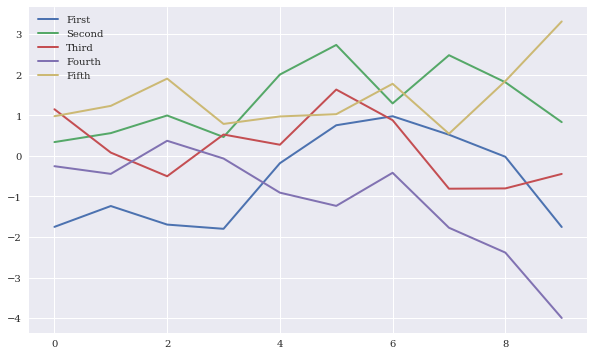

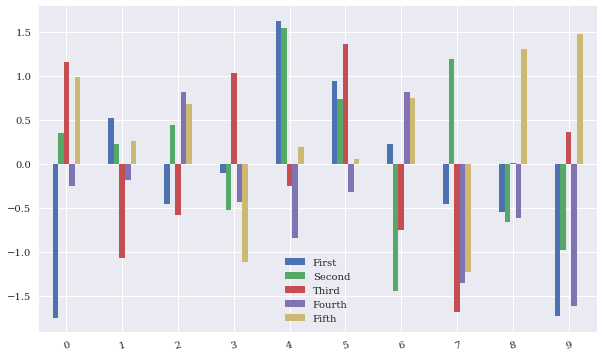

In [7]:
df.columns = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
df.index = np.arange(10)

display(df)
print(df['Second'].mean() )
print(df.info())
print(df.describe())

from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

df.cumsum().plot(lw=2.0, figsize=(10,6))
plt.show()


df.plot.bar(figsize=(10,6), rot=15)
plt.show()

We can produce a $4\times 4$ matrix

In [23]:
b = np.arange(16).reshape((4,4))
print(b)
df1 = pd.DataFrame(b)
print(df1)

and many other operations. 

The **Series** class is another important class included in
**pandas**. You can view it as a specialization of **DataFrame** but where
we have just a single column of data. It shares many of the same features as _DataFrame. As with **DataFrame**,
most operations are vectorized, achieving thereby a high performance when dealing with computations of arrays, in particular labeled arrays.
As we will see below it leads also to a very concice code close to the mathematical operations we may be interested in.
For multidimensional arrays, we recommend strongly [xarray](http://xarray.pydata.org/en/stable/). **xarray** has much of the same flexibility as **pandas**, but allows for the extension to higher dimensions than two. We will see examples later of the usage of both **pandas** and **xarray**. 



## Reading Data and fitting

In order to study various Machine Learning algorithms, we need to
access data. Acccessing data is an essential step in all machine
learning algorithms. In particular, setting up the so-called **design
matrix** (to be defined below) is often the first element we need in
order to perform our calculations. To set up the design matrix means
reading (and later, when the calculations are done, writing) data
in various formats, The formats span from reading files from disk,
loading data from databases and interacting with online sources
like web application programming interfaces (APIs).

In handling various input formats, as discussed above, we will mainly stay with **pandas**,
a Python package which allows us, in a seamless and painless way, to
deal with a multitude of formats, from standard **csv** (comma separated
values) files, via **excel**, **html** to **hdf5** formats.  With **pandas**
and the **DataFrame**  and **Series** functionalities we are able to convert text data
into the calculational formats we need for a specific algorithm. And our code is going to be 
pretty close the basic mathematical expressions.

Our first data set is going to be a classic from nuclear physics, namely all
available data on binding energies. Don't be intimidated if you are not familiar with nuclear physics. It serves simply as an example here of a data set. 

We will show some of the
strengths of packages like **Scikit-Learn** in fitting nuclear binding energies to
specific functions using linear regression first. Then, as a teaser, we will show you how 
you can easily implement other algorithms like decision trees and random forests and neural networks.

But before we really start with nuclear physics data, let's just look at some simpler polynomial fitting cases, such as,
(don't be offended) fitting straight lines!


### Simple linear regression model using **scikit-learn**

We start with perhaps our simplest possible example, using **Scikit-Learn** to perform linear regression analysis on a data set produced by us. 

What follows is a simple Python code where we have defined a function
$y$ in terms of the variable $x$. Both are defined as vectors with  $100$ entries. 
The numbers in the vector $\hat{x}$ are given
by random numbers generated with a uniform distribution with entries
$x_i \in [0,1]$ (more about probability distribution functions
later). These values are then used to define a function $y(x)$
(tabulated again as a vector) with a linear dependence on $x$ plus a
random noise added via the normal distribution.


The Numpy functions are imported used the **import numpy as np**
statement and the random number generator for the uniform distribution
is called using the function **np.random.rand()**, where we specificy
that we want $100$ random variables.  Using Numpy we define
automatically an array with the specified number of elements, $100$ in
our case.  With the Numpy function **randn()** we can compute random
numbers with the normal distribution (mean value $\mu$ equal to zero and
variance $\sigma^2$ set to one) and produce the values of $y$ assuming a linear
dependence as function of $x$

$$
y = 2x+N(0,1),
$$

where $N(0,1)$ represents random numbers generated by the normal
distribution.  From **Scikit-Learn** we import then the
**LinearRegression** functionality and make a prediction $\tilde{y} =
\alpha + \beta x$ using the function **fit(x,y)**. We call the set of
data $(\hat{x},\hat{y})$ for our training data. The Python package
**scikit-learn** has also a functionality which extracts the above
fitting parameters $\alpha$ and $\beta$ (see below). Later we will
distinguish between training data and test data.

For plotting we use the Python package
[matplotlib](https://matplotlib.org/) which produces publication
quality figures. Feel free to explore the extensive
[gallery](https://matplotlib.org/gallery/index.html) of examples. In
this example we plot our original values of $x$ and $y$ as well as the
prediction **ypredict** ($\tilde{y}$), which attempts at fitting our
data with a straight line.

The Python code follows here.

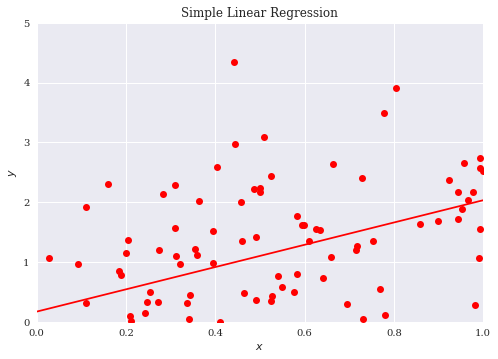

In [8]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 2*x+np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
xnew = np.array([[0],[1]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Simple Linear Regression')
plt.show()

This example serves several aims. It allows us to demonstrate several
aspects of data analysis and later machine learning algorithms. The
immediate visualization shows that our linear fit is not
impressive. It goes through the data points, but there are many
outliers which are not reproduced by our linear regression.  We could
now play around with this small program and change for example the
factor in front of $x$ and the normal distribution.  Try to change the
function $y$ to

$$
y = 10x+0.01 \times N(0,1),
$$

where $x$ is defined as before.  Does the fit look better? Indeed, by
reducing the role of the noise given by the normal distribution we see immediately that
our linear prediction seemingly reproduces better the training
set. However, this testing 'by the eye' is obviouly not satisfactory in the
long run. Here we have only defined the training data and our model, and 
have not discussed a more rigorous approach to the **cost** function.

We need more rigorous criteria in defining whether we have succeeded or
not in modeling our training data.  You will be surprised to see that
many scientists seldomly venture beyond this 'by the eye' approach. A
standard approach for the *cost* function is the so-called $\chi^2$
function (a variant of the mean-squared error (MSE))

$$
\chi^2 = \frac{1}{n}
\sum_{i=0}^{n-1}\frac{(y_i-\tilde{y}_i)^2}{\sigma_i^2},
$$

where $\sigma_i^2$ is the variance (to be defined later) of the entry
$y_i$.  We may not know the explicit value of $\sigma_i^2$, it serves
however the aim of scaling the equations and make the cost function
dimensionless.  

Minimizing the cost function is a central aspect of
our discussions to come. Finding its minima as function of the model
parameters ($\alpha$ and $\beta$ in our case) will be a recurring
theme in these series of lectures. Essentially all machine learning
algorithms we will discuss center around the minimization of the
chosen cost function. This depends in turn on our specific
model for describing the data, a typical situation in supervised
learning. Automatizing the search for the minima of the cost function is a
central ingredient in all algorithms. Typical methods which are
employed are various variants of **gradient** methods. These will be
discussed in more detail later. Again, you'll be surprised to hear that
many practitioners minimize the above function ''by the eye', popularly dubbed as 
'chi by the eye'. That is, change a parameter and see (visually and numerically) that 
the  $\chi^2$ function becomes smaller. 

There are many ways to define the cost function. A simpler approach is to look at the relative difference between the training data and the predicted data, that is we define 
the relative error (why would we prefer the MSE instead of the relative error?) as

$$
\epsilon_{\mathrm{relative}}= \frac{\vert \hat{y} -\hat{\tilde{y}}\vert}{\vert \hat{y}\vert}.
$$

We can modify easily the above Python code and plot the relative error instead

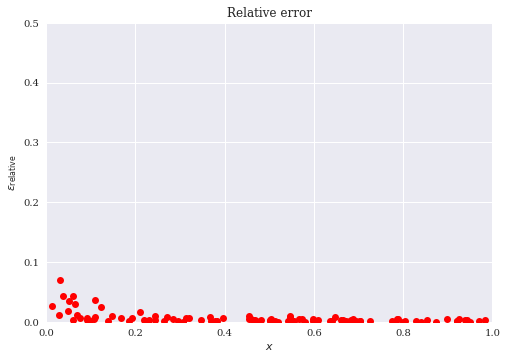

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 5*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)

plt.plot(x, np.abs(ypredict-y)/abs(y), "ro")
plt.axis([0,1.0,0.0, 0.5])
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{relative}}$')
plt.title(r'Relative error')
plt.show()

Depending on the parameter in front of the normal distribution, we may
have a small or larger relative error. Try to play around with
different training data sets and study (graphically) the value of the
relative error.

As mentioned above, **Scikit-Learn** has an impressive functionality.
We can for example extract the values of $\alpha$ and $\beta$ and
their error estimates, or the variance and standard deviation and many
other properties from the statistical data analysis. 

Here we show an
example of the functionality of **Scikit-Learn**.

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

x = np.random.rand(100,1)
y = 2.0+ 5*x+0.5*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, ypredict))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, ypredict))
# Mean squared log error                                                        
print('Mean squared log error: %.2f' % mean_squared_log_error(y, ypredict) )
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(y, ypredict))
plt.plot(x, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression fit ')
plt.show()

The function **coef** gives us the parameter $\beta$ of our fit while **intercept** yields 
$\alpha$. Depending on the constant in front of the normal distribution, we get values near or far from $alpha =2$ and $\beta =5$. Try to play around with different parameters in front of the normal distribution. The function **meansquarederror** gives us the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

The smaller the value, the better the fit. Ideally we would like to
have an MSE equal zero.  The attentive reader has probably recognized
this function as being similar to the $\chi^2$ function defined above.

The **r2score** function computes $R^2$, the coefficient of
determination. It provides a measure of how well future samples are
likely to be predicted by the model. Best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of $\hat{y}$,
disregarding the input features, would get a $R^2$ score of $0.0$.

If $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Another quantity taht we will meet again in our discussions of regression analysis is 
 the mean absolute error (MAE), a risk metric corresponding to the expected value of the absolute error loss or what we call the $l1$-norm loss. In our discussion above we presented the relative error.
The MAE is defined as follows

$$
\text{MAE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \tilde{y}_i \right|.
$$

Finally we present the 
squared logarithmic (quadratic) error

$$
\text{MSLE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \tilde{y}_i) )^2,
$$

where $\log_e (x)$ stands for the natural logarithm of $x$. This error
estimate is best to use when targets having exponential growth, such
as population counts, average sales of a commodity over a span of
years etc. 

We will discuss in more
detail these and other functions in the various lectures.  We conclude this part with another example. Instead of 
a linear $x$-dependence we study now a cubic polynomial and use the polynomial regression analysis tools of scikit-learn.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

x=np.linspace(0.02,0.98,200)
noise = np.asarray(random.sample((range(200)),200))
y=x**3*noise
yn=x**3*100
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(x[:,np.newaxis])
poly3_plot=plt.plot(x, clf3.predict(Xplot), label='Cubic Fit')
plt.plot(x,yn, color='red', label="True Cubic")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

def error(a):
    for i in y:
        err=(y-yn)/yn
    return abs(np.sum(err))/len(err)

print (error(y))

### To our real data: nuclear binding energies. Brief reminder on masses and binding energies

Let us now dive into  nuclear physics and remind ourselves briefly about some basic features about binding
energies.  A basic quantity which can be measured for the ground
states of nuclei is the atomic mass $M(N, Z)$ of the neutral atom with
atomic mass number $A$ and charge $Z$. The number of neutrons is $N$. There are indeed several sophisticated experiments worldwide which allow us to measure this quantity to high precision (parts per million even). 

Atomic masses are usually tabulated in terms of the mass excess defined by

$$
\Delta M(N, Z) =  M(N, Z) - uA,
$$

where $u$ is the Atomic Mass Unit

$$
u = M(^{12}\mathrm{C})/12 = 931.4940954(57) \hspace{0.1cm} \mathrm{MeV}/c^2.
$$

The nucleon masses are

$$
m_p =  1.00727646693(9)u,
$$

and

$$
m_n = 939.56536(8)\hspace{0.1cm} \mathrm{MeV}/c^2 = 1.0086649156(6)u.
$$

In the [2016 mass evaluation of by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu](http://nuclearmasses.org/resources_folder/Wang_2017_Chinese_Phys_C_41_030003.pdf)
there are data on masses and decays of 3437 nuclei.

The nuclear binding energy is defined as the energy required to break
up a given nucleus into its constituent parts of $N$ neutrons and $Z$
protons. In terms of the atomic masses $M(N, Z)$ the binding energy is
defined by

$$
BE(N, Z) = ZM_H c^2 + Nm_n c^2 - M(N, Z)c^2 ,
$$

where $M_H$ is the mass of the hydrogen atom and $m_n$ is the mass of the neutron.
In terms of the mass excess the binding energy is given by

$$
BE(N, Z) = Z\Delta_H c^2 + N\Delta_n c^2 -\Delta(N, Z)c^2 ,
$$

where $\Delta_H c^2 = 7.2890$ MeV and $\Delta_n c^2 = 8.0713$ MeV.


A popular and physically intuitive model which can be used to parametrize 
the experimental binding energies as function of $A$, is the so-called 
**liquid drop model**. The ansatz is based on the following expression

$$
BE(N,Z) = a_1A-a_2A^{2/3}-a_3\frac{Z^2}{A^{1/3}}-a_4\frac{(N-Z)^2}{A},
$$

where $A$ stands for the number of nucleons and the $a_i$s are parameters which are determined by a fit 
to the experimental data.  




To arrive at the above expression we have assumed that we can make the following assumptions:

 * There is a volume term $a_1A$ proportional with the number of nucleons (the energy is also an extensive quantity). When an assembly of nucleons of the same size is packed together into the smallest volume, each interior nucleon has a certain number of other nucleons in contact with it. This contribution is proportional to the volume.

 * There is a surface energy term $a_2A^{2/3}$. The assumption here is that a nucleon at the surface of a nucleus interacts with fewer other nucleons than one in the interior of the nucleus and hence its binding energy is less. This surface energy term takes that into account and is therefore negative and is proportional to the surface area.

 * There is a Coulomb energy term $a_3\frac{Z^2}{A^{1/3}}$. The electric repulsion between each pair of protons in a nucleus yields less binding. 

 * There is an asymmetry term $a_4\frac{(N-Z)^2}{A}$. This term is associated with the Pauli exclusion principle and reflects the fact that the proton-neutron interaction is more attractive on the average than the neutron-neutron and proton-proton interactions.

We could also add a so-called pairing term, which is a correction term that
arises from the tendency of proton pairs and neutron pairs to
occur. An even number of particles is more stable than an odd number. 


### Organizing our data

Let us start with reading and organizing our data. 
We start with the compilation of masses and binding energies from 2016.
After having downloaded this file to our own computer, we are now ready to read the file and start structuring our data.


We start with preparing folders for storing our calculations and the data file over masses and binding energies. We import also various modules that we will find useful in order to present various Machine Learning methods. Here we focus mainly on the functionality of **scikit-learn**.

In [12]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')

Before we proceed, we define also a function for making our plots. You can obviously avoid this and simply set up various **matplotlib** commands every time you need them. You may however find it convenient to collect all such commands in one function and simply call this function.

In [13]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def MakePlot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

Our next step is to read the data on experimental binding energies and
reorganize them as functions of the mass number $A$, the number of
protons $Z$ and neutrons $N$ using **pandas**.  Before we do this it is
always useful (unless you have a binary file or other types of compressed
data) to actually open the file and simply take a look at it!


In particular, the program that outputs the final nuclear masses is written in Fortran with a specific format. It means that we need to figure out the format and which columns contain the data we are interested in. Pandas comes with a function that reads formatted output. After having admired the file, we are now ready to start massaging it with **pandas**. The file begins with some basic format information.

In [30]:
"""                                                                                                                         
This is taken from the data file of the mass 2016 evaluation.                                                               
All files are 3436 lines long with 124 character per line.                                                                  
       Headers are 39 lines long.                                                                                           
   col 1     :  Fortran character control: 1 = page feed  0 = line feed                                                     
   format    :  a1,i3,i5,i5,i5,1x,a3,a4,1x,f13.5,f11.5,f11.3,f9.3,1x,a2,f11.3,f9.3,1x,i3,1x,f12.5,f11.5                     
   These formats are reflected in the pandas widths variable below, see the statement                                       
   widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),                                                            
   Pandas has also a variable header, with length 39 in this case.                                                          
"""

The data we are interested in are in columns 2, 3, 4 and 11, giving us
the number of neutrons, protons, mass numbers and binding energies,
respectively. We add also for the sake of completeness the element name. The data are in fixed-width formatted lines and we will
covert them into the **pandas** DataFrame structure.

In [14]:
# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])

We have now read in the data, grouped them according to the variables we are interested in. 
We see how easy it is to reorganize the data using **pandas**. If we
were to do these operations in C/C++ or Fortran, we would have had to
write various functions/subroutines which perform the above
reorganizations for us.  Having reorganized the data, we can now start
to make some simple fits using both the functionalities in **numpy** and
**Scikit-Learn** afterwards. 

Now we define five variables which contain
the number of nucleons $A$, the number of protons $Z$ and the number of neutrons $N$, the element name and finally the energies themselves.

In [15]:
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']
print(Masses)

            N    Z    A Element  Ebinding
A                                        
1   0       0    1    1       H  0.000000
2   1       1    1    2       H  1.112283
3   2       2    1    3       H  2.827265
4   6       2    2    4      He  7.073915
5   9       3    2    5      He  5.512132
6   14      3    3    6      Li  5.332331
7   19      4    3    7      Li  5.606439
8   24      4    4    8      Be  7.062435
9   29      5    4    9      Be  6.462668
10  34      6    4   10      Be  6.497630
11  40      6    5   11       B  6.927732
12  46      6    6   12       C  7.680144
13  52      7    6   13       C  7.469849
14  57      8    6   14       C  7.520319
15  64      8    7   15       N  7.699460
16  72      8    8   16       O  7.976206
17  78      9    8   17       O  7.750728
18  85     10    8   18       O  7.767097
19  93     10    9   19       F  7.779018
20  102    10   10   20      Ne  8.032240
21  110    11   10   21      Ne  7.971713
22  118    12   10   22      Ne  8

The next step, and we will define this mathematically later, is to set up the so-called **design matrix**. We will throughout call this matrix $\boldsymbol{X}$.
It has dimensionality $p\times n$, where $n$ is the number of data points and $p$ are the so-called predictors. In our case here they are given by the number of polynomials in $A$ we wish to include in the fit.

In [16]:
# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)

With **scikitlearn** we are now ready to use linear regression and fit our data.

In [34]:
clf = skl.LinearRegression().fit(X, Energies)
fity = clf.predict(X)

Pretty simple!  
Now we can print measures of how our fit is doing, the coefficients from the fits and plot the final fit together with our data.

In [35]:
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, fity))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, fity))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, fity))
print(clf.coef_, clf.intercept_)

Masses['Eapprox']  = fity
# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Masses['A'], Masses['Ebinding'], alpha=0.7, lw=2,
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.7, lw=2, c='m',
            label='Fit')
ax.legend()
save_fig("Masses2016")
plt.show()

### Seeing the wood for the trees

As a teaser, let us now see how we can do this with decision trees using **scikit-learn**. Later we will switch to so-called **random forests**!

In [36]:

#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regr_1=DecisionTreeRegressor(max_depth=5)
regr_2=DecisionTreeRegressor(max_depth=7)
regr_3=DecisionTreeRegressor(max_depth=9)
regr_1.fit(X, Energies)
regr_2.fit(X, Energies)
regr_3.fit(X, Energies)


y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3=regr_3.predict(X)
Masses['Eapprox'] = y_3
# Plot the results
plt.figure()
plt.plot(A, Energies, color="blue", label="Data", linewidth=2)
plt.plot(A, y_1, color="red", label="max_depth=5", linewidth=2)
plt.plot(A, y_2, color="green", label="max_depth=7", linewidth=2)
plt.plot(A, y_3, color="m", label="max_depth=9", linewidth=2)

plt.xlabel("$A$")
plt.ylabel("$E$[MeV]")
plt.title("Decision Tree Regression")
plt.legend()
save_fig("Masses2016Trees")
plt.show()
print(Masses)
print(np.mean( (Energies-y_1)**2))

### And what about using neural networks?

The **seaborn** package allows us to visualize data in an efficient way. Note that we use **scikit-learn**'s multi-layer perceptron (or feed forward neural network) 
functionality.

In [37]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns

X_train = X
Y_train = Energies
n_hidden_neurons = 100
epochs = 100
# store models for later use
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
# store the models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
sns.set()
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPRegressor(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, Y_train)
        DNN_scikit[i][j] = dnn
        train_accuracy[i][j] = dnn.score(X_train, Y_train)

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## A first summary

The aim behind these introductory words was to present to you various
Python libraries and their functionalities, in particular libraries like
**numpy**, **pandas**, **xarray** and **matplotlib** and other that make our life much easier
in handling various data sets and visualizing data. 

Furthermore,
**Scikit-Learn** allows us with few lines of code to implement popular
Machine Learning algorithms for supervised learning. Later we will meet **Tensorflow**, a powerful library for deep learning. 
Now it is time to dive more into the details of various methods. We will start with linear regression and try to take a deeper look at what it entails.